# K-Means Clustering

### Name: Mantas Macionis
### StudentID: C00242178

This is a notebook on K-Means clustering, covering the process of getting the data for a K-Means cluster, building the model and visualising the clusters
Originally created by github user cgivre and downloaded from: [github](https://github.com/cgivre/oreilly-sec-ds-fundamentals/blob/master/Notebooks/Unsupervised/K-Means%20Clustering%20Example.ipynb)

The purpose of editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

[Link to K-Means Clustering Changelog](#k-means-clustering-changelog)


## Overview of changes 
### Changes to K-Means Clustering Notebook
- Using data and model in example, created elbow plot visualisation for optimal clusters
- Calculated the silhouette score for the example model
- Loaded iris dataset, applied kmeans, retrieved silhouette score
- Experiment changing cluster count to compare with silhouette score retrieved for each different cluster number being used
- With iris dataset, 2 clusters is seen to be most effective for silhouette score, even with 3 classes being in the dataset
- Output K-Means clustering visualisation for highest silhouette rated cluster no
- Output silhouette plot visualisation with 2 clusters in use


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

# K-Means Clustering Example
In this example notebook, you will see how to implement K-Means Clustering in Python using Scikit-Learn and Pandas. 
Adapted from https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/

## Step 1:  Get Data:
The first step is to prepare or generate the data.  In this dataset, the observations only have two features, but K-Means can be used with any number of features.  Since this is an unsupervised example, it is not necessary to have a "target" column.

In [3]:
data = pd.DataFrame([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]], columns=['x','y'])
print( data )

     x     y
0  1.0   2.0
1  5.0   8.0
2  1.5   1.8
3  8.0   8.0
4  1.0   0.6
5  9.0  11.0


## Step 2:  Build the Model:
Much like the supervised models, you first create the model then call the `.fit()` method using your data source.  The model is now populated with both your centroids and labels.  These can be accessed via the `.cluster_centers_` and `labels_` properties respectively.

You can view the complete documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-Means also has a `.predict()` method which can be used to predict the label for an observation.

In [4]:
kmeans = KMeans(n_clusters=2).fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


# Visualizing the Clusters
The code below visualizes the clusters.  

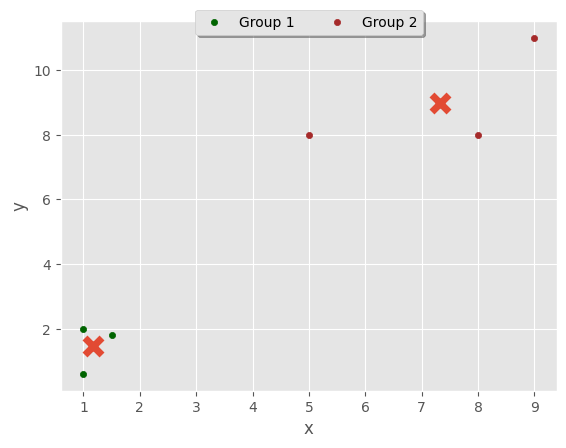

In [5]:
data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

<a id="k-means-clustering-changelog"></a>
# K-Means Clustering Changelog

## Elbow plot for existing data

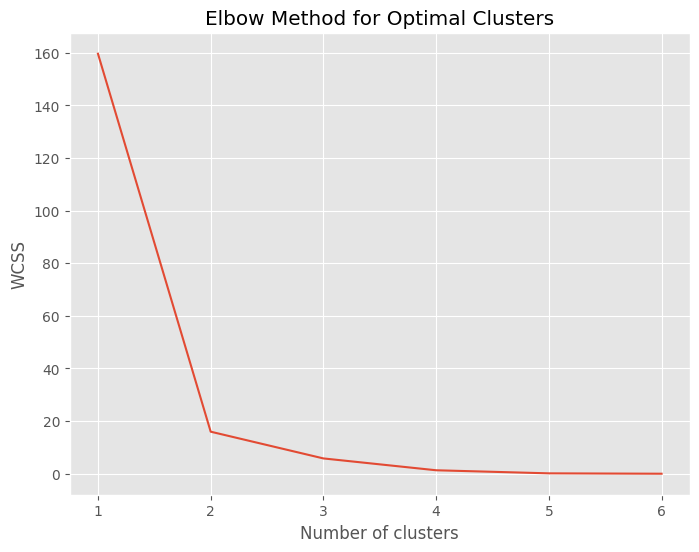

In [6]:
# Adjusting the elbow plot to fit the dataset size
wcss = []
for i in range(1, len(data) + 1):  # Adjusting the range to the size of the dataset
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(data) + 1), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The elbow plot shows that 1 cluster is most effective when using K-Means clustering with the original dataset
- WCSS(Within-Cluster Sum of Squares) decreases rapidly with more then 1 cluster in use

## Performance Metrics
- Due to the unsupervised nature of K-Means clustering, regular metrics cannot be obtained.
- A silhouette score will be calculated instead

In [7]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)

silhouette_avg

0.7494910093882838

- Relatively high silhouette score achieved
- silhouette score measures cohesive, seperated grouping of data points into clusters

## Iris dataset K-Means Clustering test
- iris dataset is split into 3 main classes
- n_clusters chosen is 3 because of this 

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd  

# Load Iris dataset
iris = load_iris()
X = iris.data

# Convert X to a DataFrame for better visualization and display the first few rows
X_df = pd.DataFrame(X, columns=iris.feature_names)
print("First few rows of the Iris dataset:")
print(X_df.head())

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f'\nSilhouette Score: {silhouette_avg:.3f}')


First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Silhouette Score: 0.551


- silhouette score is low
- Implying either poor clustering quality, suboptimal cluster count or feature space complexity(iris dataset distinguishability)

## Testing different n_cluster values

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Iris dataset
iris = load_iris()
X = iris.data

# Initially, start with the default parameter for n_clusters=3, which matches the actual number of classes
initial_kmeans = KMeans(n_clusters=3, random_state=42)
initial_labels = initial_kmeans.fit_predict(X)
initial_silhouette_avg = silhouette_score(X, initial_labels)
print(f'Initial Silhouette Score with n_clusters=3: {initial_silhouette_avg:.3f}')

# change the number of clusters to improve silhouette score
improved_silhouette_avg = 0
best_n_clusters = 0
for n_clusters in range(2, 6):  # Trying different values for n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print(f'Silhouette Score with n_clusters={n_clusters}: {silhouette_avg:.3f}')
    if silhouette_avg > improved_silhouette_avg:
        improved_silhouette_avg = silhouette_avg
        best_n_clusters = n_clusters

# Displaying the best silhouette score found
print(f'\nBest Silhouette Score is {improved_silhouette_avg:.3f} with n_clusters={best_n_clusters}')



Initial Silhouette Score with n_clusters=3: 0.551
Silhouette Score with n_clusters=2: 0.681
Silhouette Score with n_clusters=3: 0.551
Silhouette Score with n_clusters=4: 0.498
Silhouette Score with n_clusters=5: 0.493

Best Silhouette Score is 0.681 with n_clusters=2


- Best silhouette score achieved with n_clusters=2
- The score implies the iris dataset divides into two broad groups rather then three, even if it has three species.
- this division can be driven by similarities between two iris species being greater then their differences when viewed in multidimensional space defined by the dataset.
- it might also indicate significant overlap between the two iris species

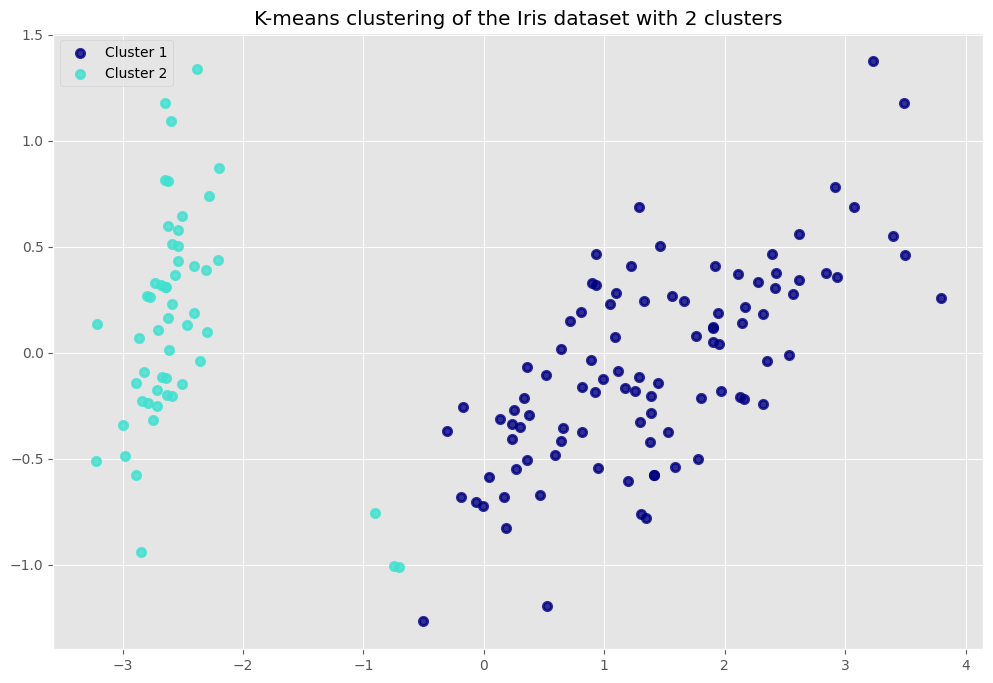

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply K-means clustering with the best n_clusters found
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Reducing dimensions for visualization
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors[:2], [0, 1], ['Cluster 1', 'Cluster 2']):
    plt.scatter(X_r[labels == i, 0], X_r[labels == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('K-means clustering of the Iris dataset with 2 clusters')
plt.show()


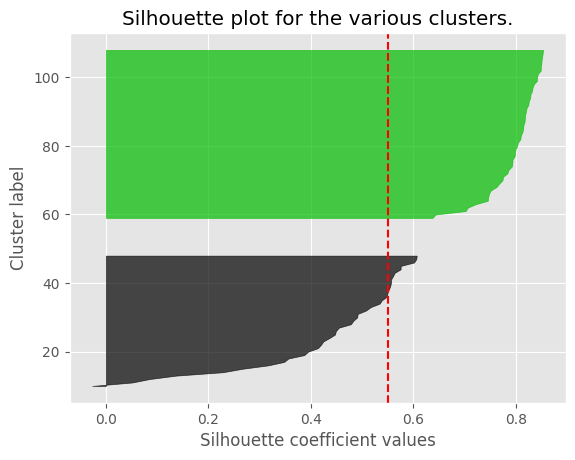

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

fig, ax1 = plt.subplots(1, 1)
y_lower = 10
for i in range(2):  # Assuming 2 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples gap

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for the various clusters.")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()
